In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 16_Diagnostic Analysis Of Stroke Symptoms Dashboard By Alfin Bahru Rahmika Umar\brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (4981, 11)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
print("Bentuk data asli:", df.shape)
# Deteksi duplikat
duplicate_count = df.duplicated().sum()
print("Jumlah duplikat:", duplicate_count)
# Hapus duplikat
df_cleaned = df.drop_duplicates()
# Deteksi missing values
print("Missing values sebelum cleaning:\n", df_cleaned.isnull().sum())
# Hapus baris yang memiliki missing values (jika ada)
df_cleaned = df_cleaned.dropna()

Bentuk data asli: (4981, 11)
Jumlah duplikat: 0
Missing values sebelum cleaning:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [7]:
# Fungsi untuk menghapus outlier menggunakan metode IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned

In [8]:
# Menghapus outlier pada kolom numerik
for col in ['age', 'avg_glucose_level', 'bmi']:
    df_cleaned = remove_outliers(df_cleaned, col)

# Bandingkan jumlah baris sebelum dan sesudah cleaning
print("Bentuk data sebelum cleaning:", df.shape)
print("Bentuk data setelah cleaning:", df_cleaned.shape)

Bentuk data sebelum cleaning: (4981, 11)
Bentuk data setelah cleaning: (4337, 11)


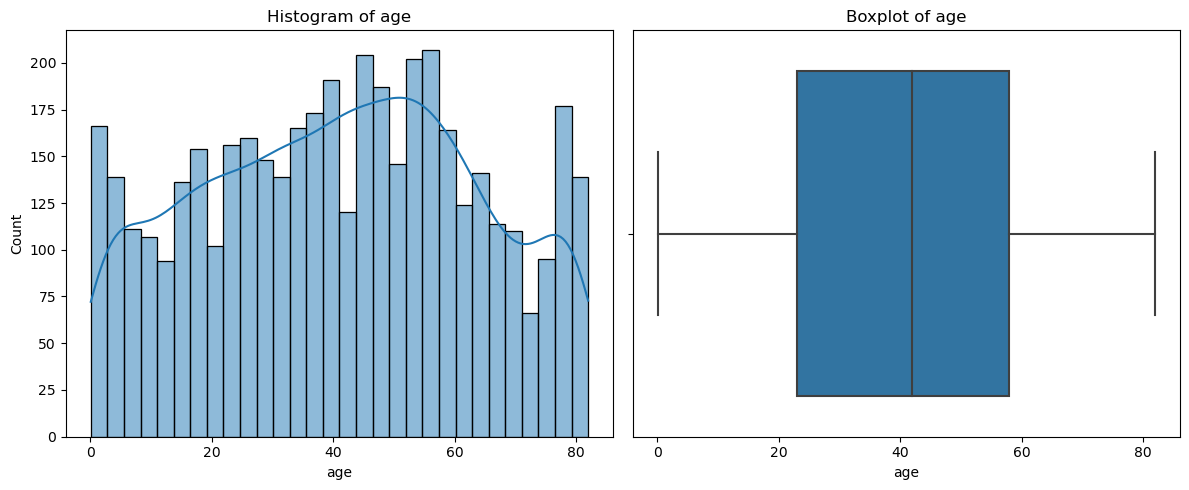

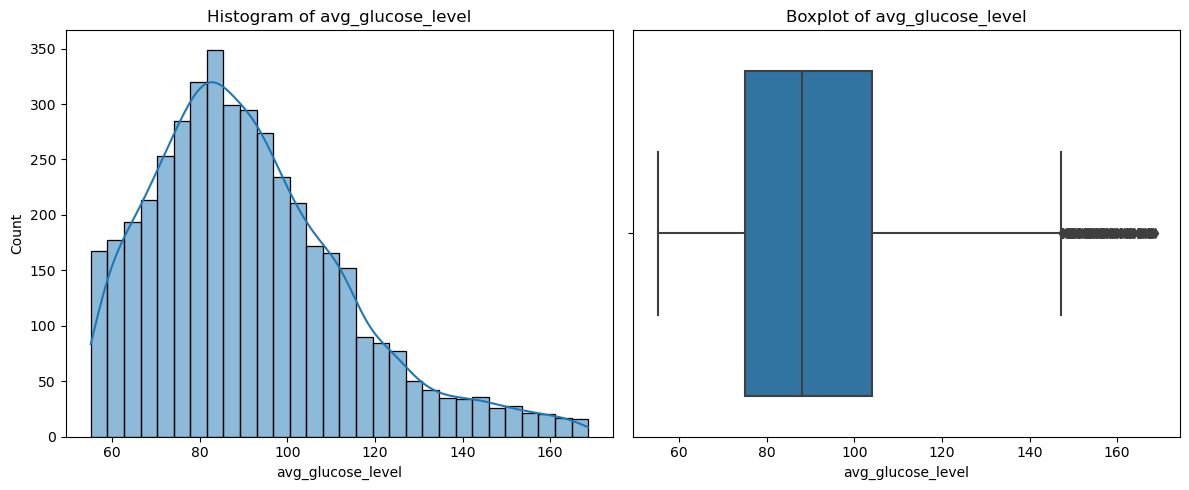

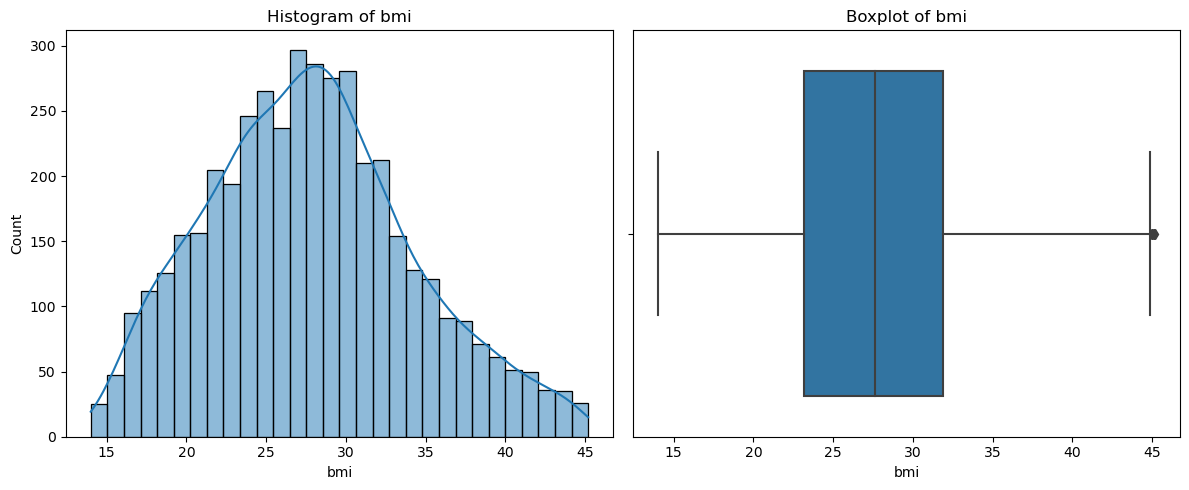

In [9]:
# Visualisasi distribusi data (Histogram dan Boxplot) untuk kolom numerik
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numeric_columns:
    plt.figure(figsize=(12,5))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

In [10]:
# Simpan dataset yang sudah dibersihkan
df_cleaned.to_csv("brain_stroke-cleaned.csv", index=False)

In [11]:
# Menghitung metrik
total_people = df_cleaned.shape[0]
stroke_records = df_cleaned['stroke'].sum()
heart_disease_records = df_cleaned['heart_disease'].sum()
hypertension_records = df_cleaned['hypertension'].sum()
avg_bmi = df_cleaned['bmi'].mean()
avg_glucose = df_cleaned['avg_glucose_level'].mean()
print(f"Total people surveyed: {total_people}")
print(f"Stroke records: {stroke_records}")
print(f"Heart Disease records: {heart_disease_records}")
print(f"Hypertension records: {hypertension_records}")
print(f"Average BMI: {avg_bmi:.2f}")
print(f"Average Glucose Level: {avg_glucose:.2f}")

Total people surveyed: 4337
Stroke records: 164
Heart Disease records: 172
Hypertension records: 325
Average BMI: 27.80
Average Glucose Level: 91.45


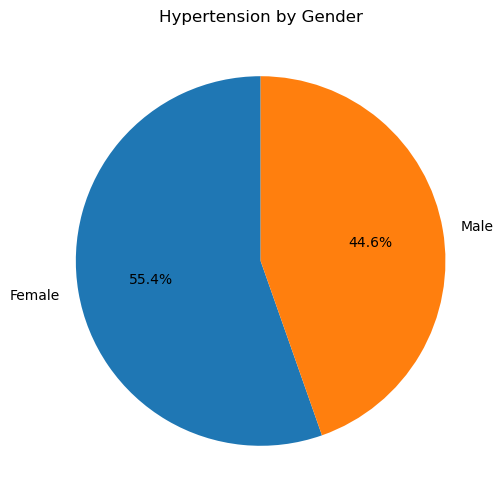

In [12]:
# Pie Chart: Hypertension Based on Gender
hypertension_gender = df_cleaned[df_cleaned['hypertension'] == 1]['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(hypertension_gender, labels=hypertension_gender.index, autopct='%1.1f%%', startangle=90)
plt.title("Hypertension by Gender")
plt.show()

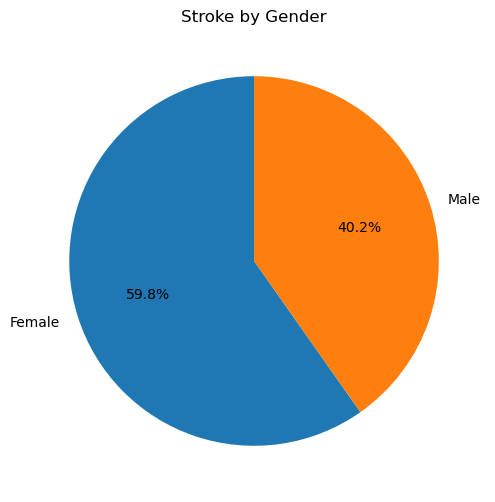

In [13]:
# Pie Chart: Stroke Based on Gender
stroke_gender = df_cleaned[df_cleaned['stroke'] == 1]['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(stroke_gender, labels=stroke_gender.index, autopct='%1.1f%%', startangle=90)
plt.title("Stroke by Gender")
plt.show()

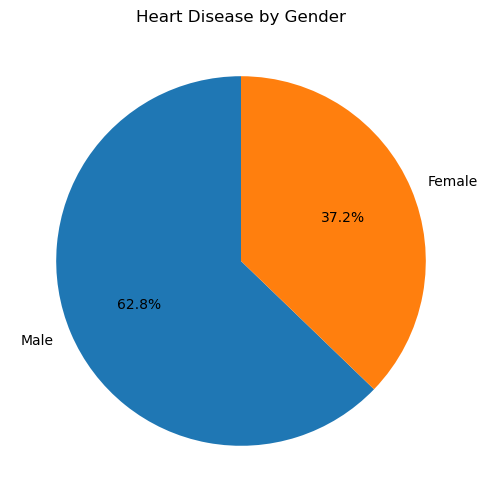

In [14]:
# Pie Chart: Heart Disease Based on Gender
heart_disease_gender = df_cleaned[df_cleaned['heart_disease'] == 1]['gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(heart_disease_gender, labels=heart_disease_gender.index, autopct='%1.1f%%', startangle=90)
plt.title("Heart Disease by Gender")
plt.show()


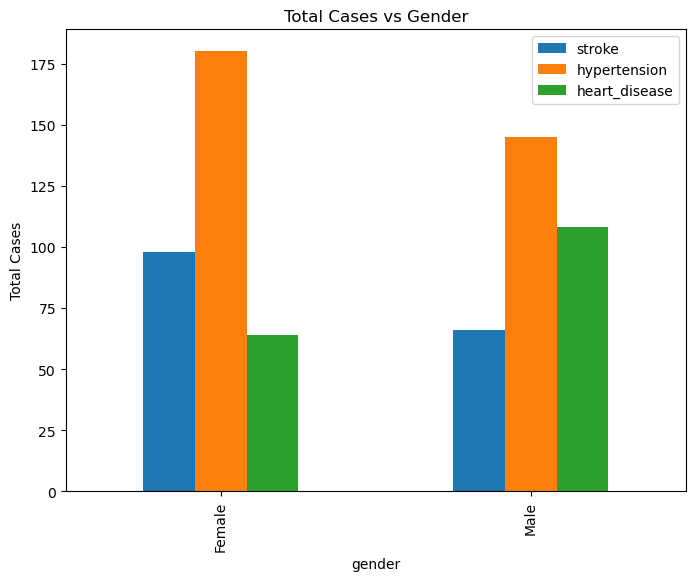

In [15]:
# Bar Chart: Total kasus Stroke, Hypertension, Heart Disease vs Gender
group_gender = df_cleaned.groupby('gender').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()
group_gender.plot(x='gender', kind='bar', figsize=(8,6))
plt.title("Total Cases vs Gender")
plt.ylabel("Total Cases")
plt.show()

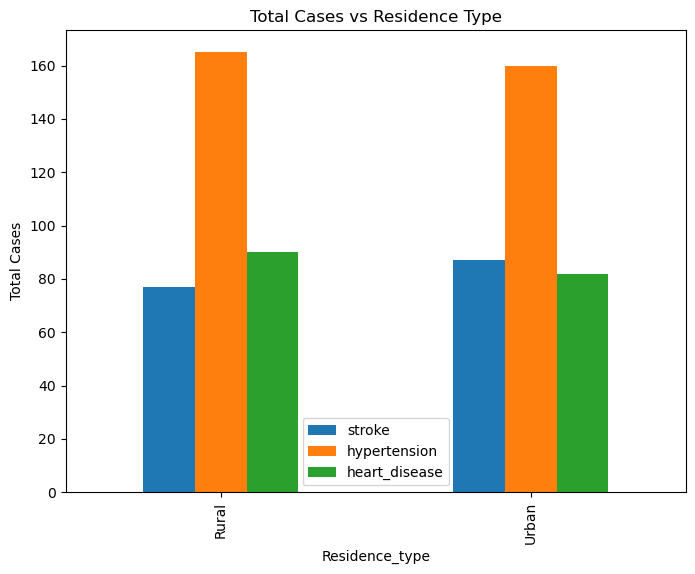

In [16]:
# Bar Chart: Total kasus vs Residence Type
group_residence = df_cleaned.groupby('Residence_type').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()
group_residence.plot(x='Residence_type', kind='bar', figsize=(8,6))
plt.title("Total Cases vs Residence Type")
plt.ylabel("Total Cases")
plt.show()

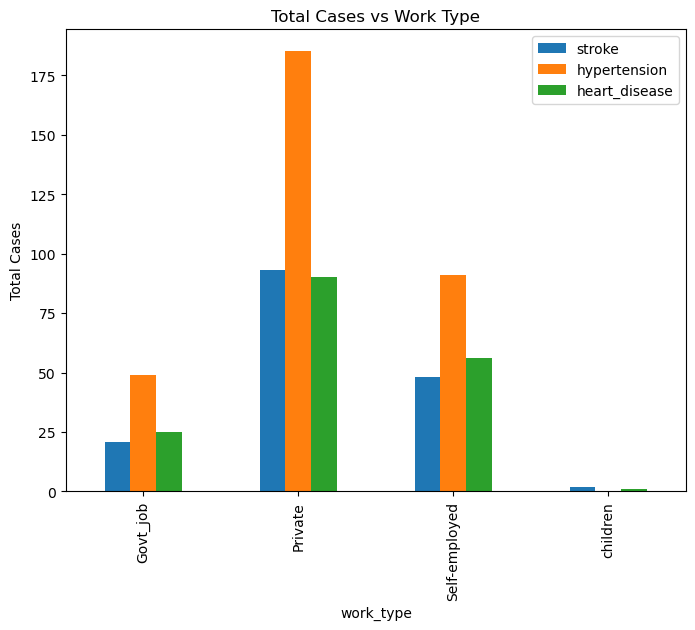

In [17]:
# Bar Chart: Total kasus vs Work Type
group_work = df_cleaned.groupby('work_type').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()
group_work.plot(x='work_type', kind='bar', figsize=(8,6))
plt.title("Total Cases vs Work Type")
plt.ylabel("Total Cases")
plt.show()

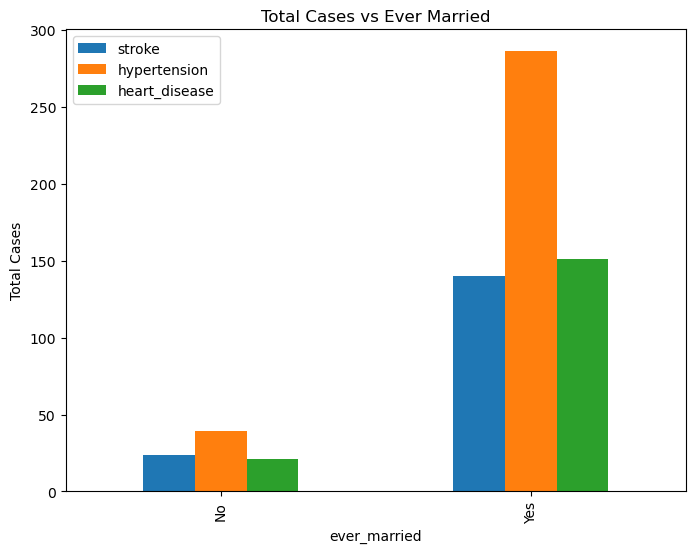

In [18]:
# Bar Chart: Total kasus vs Ever Married
group_married = df_cleaned.groupby('ever_married').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()
group_married.plot(x='ever_married', kind='bar', figsize=(8,6))
plt.title("Total Cases vs Ever Married")
plt.ylabel("Total Cases")
plt.show()

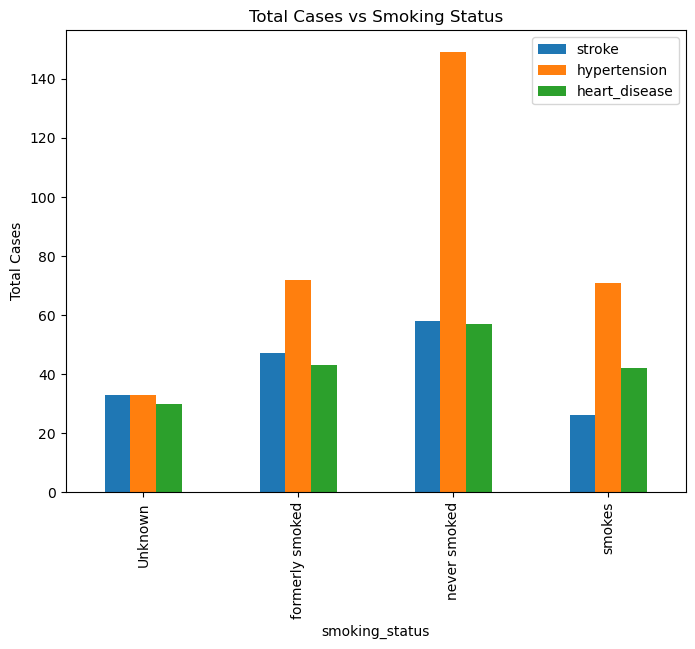

In [19]:
# Bar Chart: Total kasus vs Smoking Status
group_smoking = df_cleaned.groupby('smoking_status').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()
group_smoking.plot(x='smoking_status', kind='bar', figsize=(8,6))
plt.title("Total Cases vs Smoking Status")
plt.ylabel("Total Cases")
plt.show()

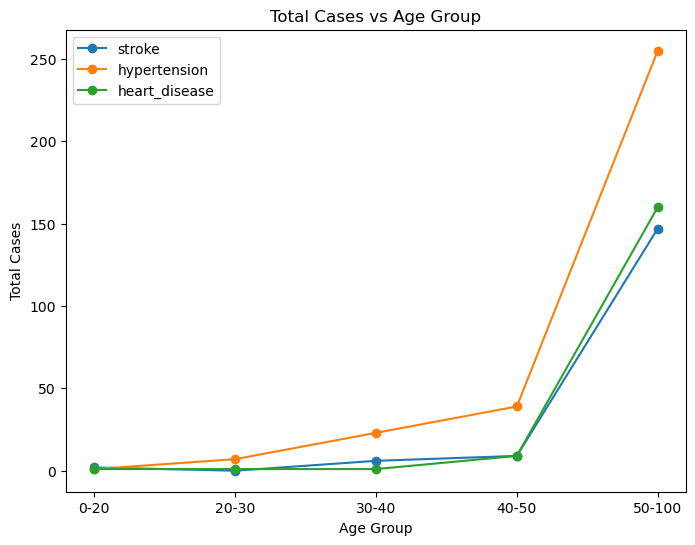

In [20]:
bins_age = [0,20,30,40,50,100]
labels_age = ['0-20','20-30','30-40','40-50','50-100']
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins_age, labels=labels_age, right=False)
age_grouped = df_cleaned.groupby('age_group').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()

plt.figure(figsize=(8,6))
for col in ['stroke', 'hypertension', 'heart_disease']:
    plt.plot(age_grouped['age_group'], age_grouped[col], marker='o', label=col)
plt.title("Total Cases vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

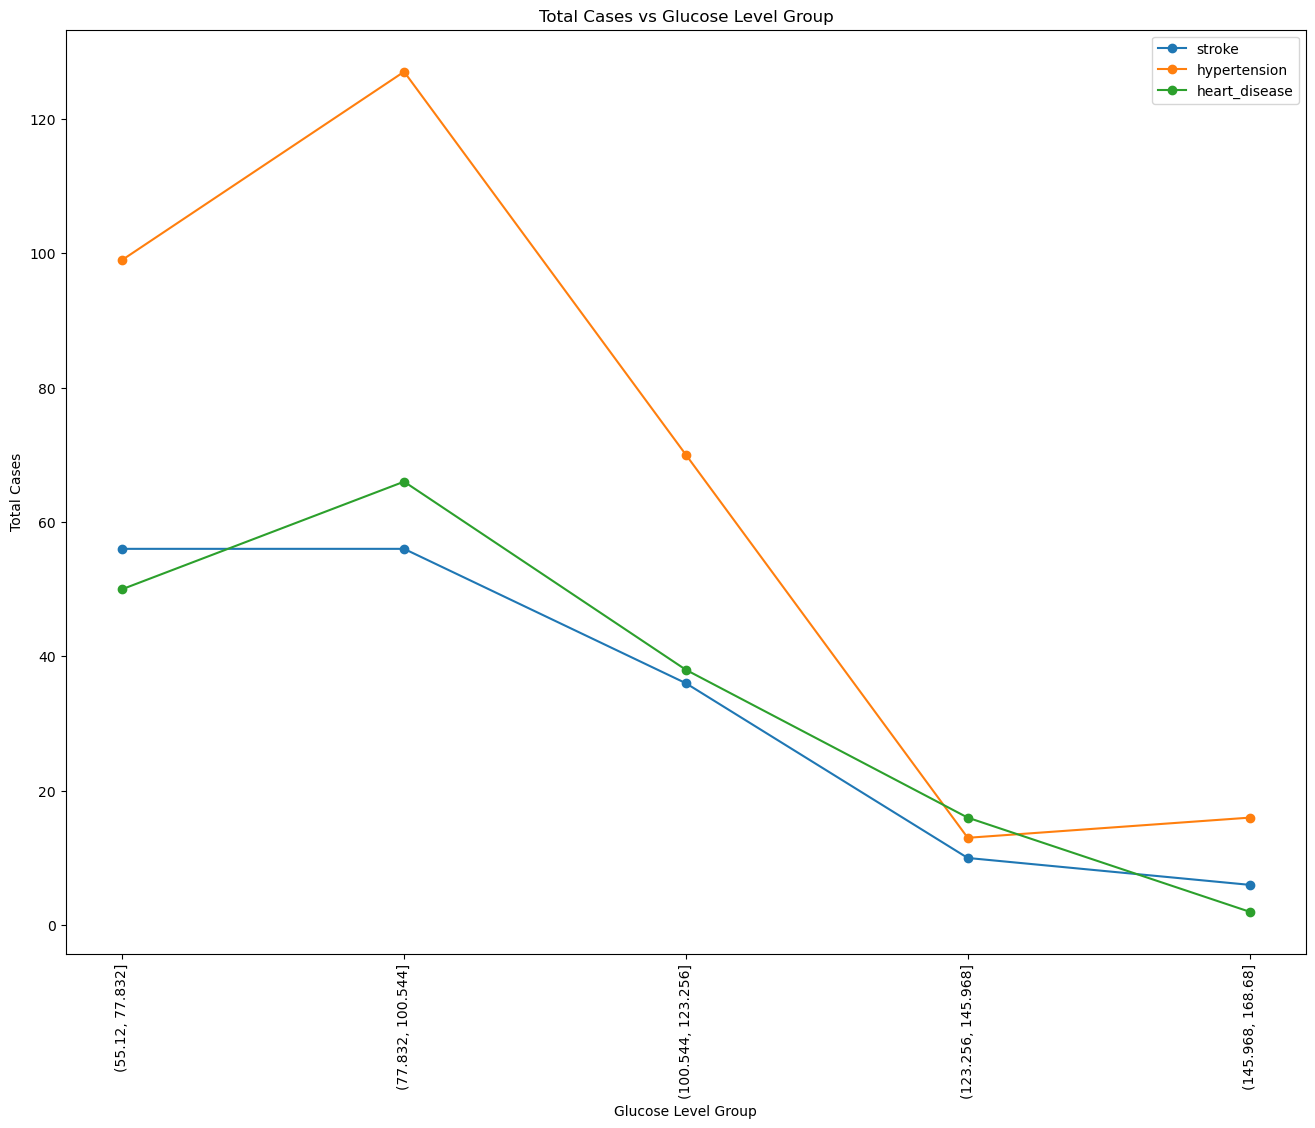

In [25]:
# Membuat bins untuk avg_glucose_level
bins_glucose = np.linspace(df_cleaned['avg_glucose_level'].min(), df_cleaned['avg_glucose_level'].max(), 6)
df_cleaned['glucose_group'] = pd.cut(df_cleaned['avg_glucose_level'], bins=bins_glucose)
glucose_grouped = df_cleaned.groupby('glucose_group').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()

plt.figure(figsize=(16,12))
for col in ['stroke', 'hypertension', 'heart_disease']:
    plt.plot(glucose_grouped['glucose_group'].astype(str), glucose_grouped[col], marker='o', label=col)
plt.title("Total Cases vs Glucose Level Group")
plt.xlabel("Glucose Level Group")
plt.ylabel("Total Cases")
plt.legend()
plt.xticks(rotation=90)
plt.show()

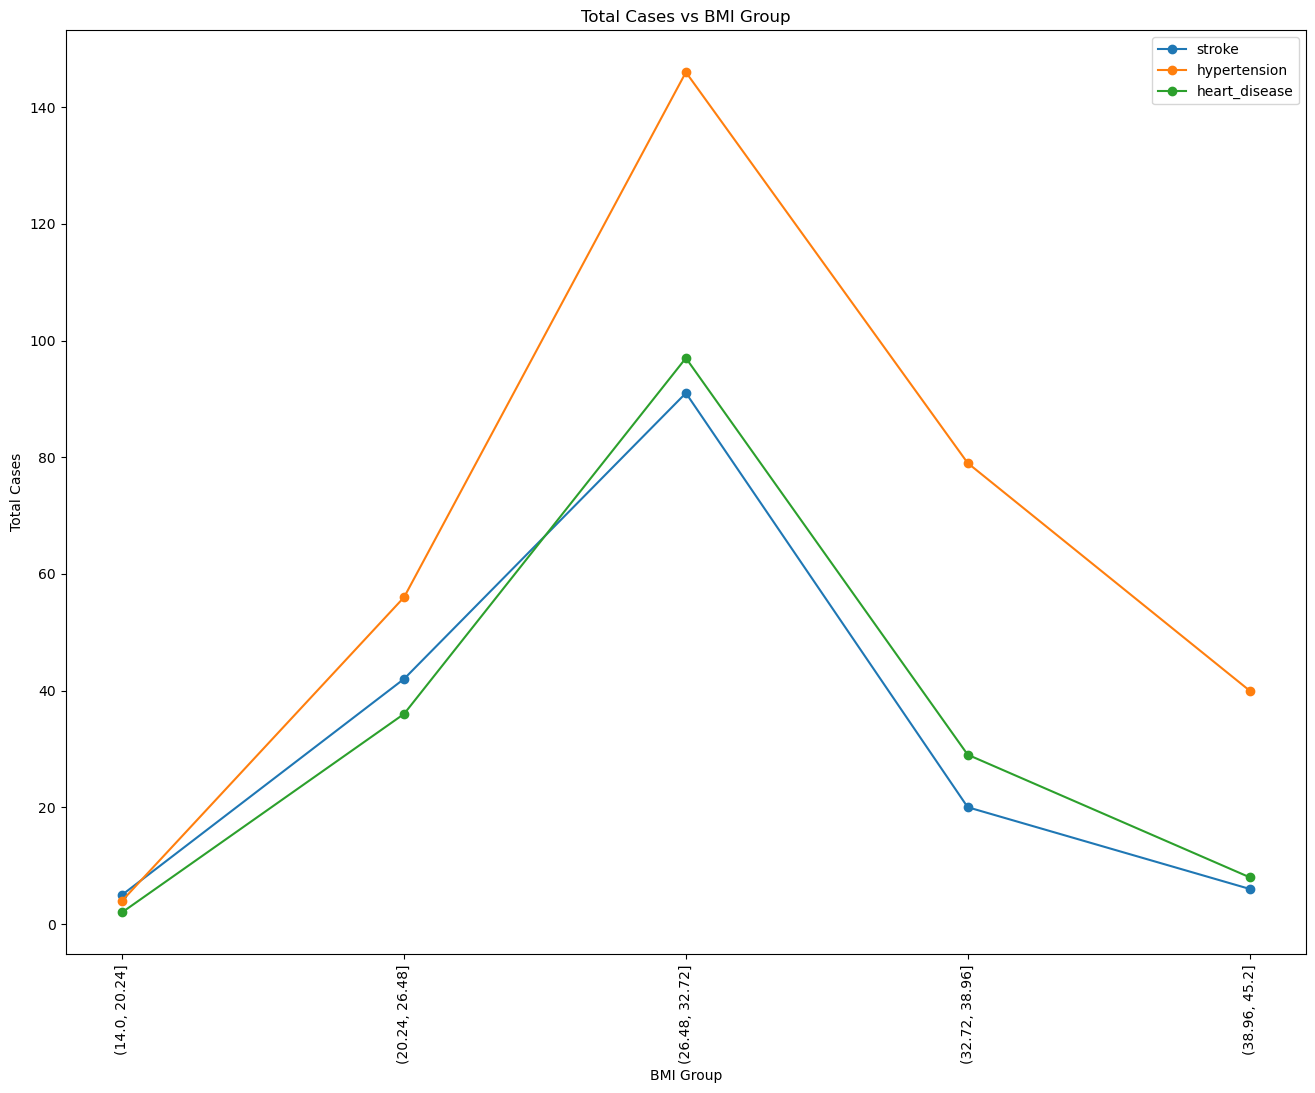

In [27]:
# Membuat bins untuk BMI
bins_bmi = np.linspace(df_cleaned['bmi'].min(), df_cleaned['bmi'].max(), 6)
df_cleaned['bmi_group'] = pd.cut(df_cleaned['bmi'], bins=bins_bmi)
bmi_grouped = df_cleaned.groupby('bmi_group').agg({'stroke':'sum', 'hypertension':'sum', 'heart_disease':'sum'}).reset_index()

plt.figure(figsize=(16,12))
for col in ['stroke', 'hypertension', 'heart_disease']:
    plt.plot(bmi_grouped['bmi_group'].astype(str), bmi_grouped[col], marker='o', label=col)
plt.title("Total Cases vs BMI Group")
plt.xlabel("BMI Group")
plt.ylabel("Total Cases")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [23]:
# # Pastikan instalasi dash terlebih dahulu: pip install dash
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Contoh: Membuat figure Plotly untuk pie chart Stroke berdasarkan Gender
# fig_stroke_gender = px.pie(
#     names=stroke_gender.index,
#     values=stroke_gender.values,
#     title="Stroke by Gender"
# )

# # Contoh: Membuat figure Plotly untuk bar chart berdasarkan Gender
# fig_bar_gender = px.bar(
#     group_gender,
#     x='gender',
#     y=['stroke', 'hypertension', 'heart_disease'],
#     barmode='group',
#     title="Total Cases vs Gender"
# )

# # Membuat layout dashboard dengan Dash
# app = dash.Dash(__name__)

# app.layout = html.Div(children=[
#     html.H1("Dashboard Analisis Brain Stroke"),
#     html.Div([
#         html.H2("Metrik Utama"),
#         html.P(f"Total People Surveyed: {total_people}"),
#         html.P(f"Stroke Records: {stroke_records}"),
#         html.P(f"Heart Disease Records: {heart_disease_records}"),
#         html.P(f"Hypertension Records: {hypertension_records}"),
#         html.P(f"Average BMI: {avg_bmi:.2f}"),
#         html.P(f"Average Glucose Level: {avg_glucose:.2f}")
#     ]),
#     html.Div([
#         dcc.Graph(figure=fig_stroke_gender),
#         dcc.Graph(figure=fig_bar_gender)
#     ]),
#     # Anda dapat menambahkan lebih banyak grafik (misalnya untuk Residence Type, Work Type, Age Group, dll.)
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
